# Week 10 Homework Template - Time Series Data

To complete assignment 10, be sure to review the following chapters:

* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/" target="_blank"> Time series data in Pandas </a>
* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/" target="_blank">The overview of the 2013 Floods in Colorado, USA</a>

in the Earth Lab Intermediate Earth Data Science online textbook on the earthdatascience.org website.

## Assignment Data

For this assignment, you will write **Python** code to download and work with time 
series data associated with a large flood event that occured in Colorado, USA in 
2013. You will explore the relationship between precipitation and stream discharge 
for Boulder Creek in Boulder, CO as they increased and decreased during the flood 
event. You will also consider how the values compared to previous years before 
the flood event. 

There are two datasets that you will need to complete this assignment:

* `colorado-flood/precipitation/805333-precip-daily-1948-2013.csv`:
    * Hourly total precipitation in inches collected between 1948 and 2013
    * Because the data are hourly, there can be multiple records for each day
    * "no data" value is 999.99
    * [Original datasource from National Oceanic and Atmospheric Administration (NOAA)](https://www.ncdc.noaa.gov/cdo-web/search)

* `"colorado-flood/precipitation/06730200-discharge-daily-1986-2013.csv`:
    * Daily mean stream discharge in cubic feet per second (CFS) between 1986-2013 
    * Dataset does not have a value for "no data"
    * [Original datasource from U.S. Geological Survey (USGS)](http://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=html&site_no=06730200&referred_module=sw&period=&begin_date=1986-10-01&end_date=2013-12-31)
    
## Data Download Instructions 
The data can be downloaded using earthpy as follows:

`et.data.get_data("colorado-flood")`

In [47]:
# Core imports needed for grading - Do not modify this cell!
import matplotcheck.notebook as nb
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag
import numpy as np

## Import Python Packages

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code to import the package/module needed to:
* create plots
* set your working directory
* download data using earthpy functions
* work with `pandas` DataFrames

You will need a special **Python** package to help format the dates when plotting your data. Make sure to include the line below which imports `DateFormatter` from `matplotlib`.

```
from matplotlib.dates import DateFormatter
```

Be sure to list the package imports following the appropriate PEP 8 order and 
spacing requirements. 

In [48]:
# YOUR CODE HERE
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
import earthpy as et

In [49]:
# Test package imports - DO NOT MODIFY THIS CELL!
import_answer_points = 0

try:
    na_val = pd.NA
    print("\u2705 Score! Pandas has been imported as a pd!")
    import_answer_points += 1
except NameError:
    print("\u274C Pandas has not been imported as a pd, please make sure to import is properly.")

try:
    t = plt.show()
    print("\u2705 Nice! matplotlib.pyplot has been imported as plt!")
    import_answer_points += 1
except NameError:
    print("matplotlib.pyplot has not been imported as plt, please make sure to import this properly.")

try:
    wd = os.getcwd()
    print("\u2705 Great work! The os module has imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the os package is imported.")

try:
    data = et.io
    print("\u2705 Score! The earthpy package has imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the earthpy package is imported using the alias et.")

try:
    the_date = DateFormatter
    print("\u2705 Nice! The DateFormatter module from matplotlib has imported correctly!")
    import_answer_points += 1
except NameError:
    print("\u274C Oops make sure that the DateFormatter module from matplotlib is imported.")

print("\n \u27A1 You received {} out of 5 points.".format(import_answer_points))

import_answer_points

✅ Score! Pandas has been imported as a pd!
✅ Nice! matplotlib.pyplot has been imported as plt!
✅ Great work! The os module has imported correctly!
✅ Score! The earthpy package has imported correctly!
✅ Nice! The DateFormatter module from matplotlib has imported correctly!

 ➡ You received 5 out of 5 points.


5

## Set Working Directory and Download Data

In the cell below complete the following task:

1. First, use EarthPy to download the `colorado-flood` data: `et.data.get_data("colorado-flood")`. When you download the data, the `earth-analytics/data` directory gets created on your computer for you.
2. **Use a conditional statement** to:
    * Set the working directory to the **`earth-analytics/data` directory in your home directory** if the path exists.
    * Print a helpful message if the path does not exist. 
* **Use reusable variable(s) to reduce repetition in your code.**
* Use the `os` package to ensure that the paths you create will run successfully on any operating system.


In [50]:
# YOUR CODE HERE
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
data_path = os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data')
if os.path.exists(data_path):
    os.chdir(data_path)
    print("Changed working dir to:", data_path)
else:
    print("The path:", data_path, "does not exist")

Changed working dir to: /Users/judith/earth-analytics/data


In [51]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
    wd_points += 5
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 5 points for setting your working directory.".format(
    wd_points))
wd_points

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data

 ➡ You received 5 out of 5 points for setting your working directory.


5

### Set Data Paths

Create paths with the `os` package for the two datasets below (both are in the 'colorado-flood' directory): 
* `805333-precip-daily-1948-2013.csv` in the `precipitation` subdirectory
* `06730200-discharge-daily-1986-2013.csv` in the `discharge` subdirectory

In [52]:
# YOUR CODE HERE
precip_path = os.path.join(
    "colorado-flood",
    "precipitation",
    "805333-precip-daily-1948-2013.csv",
)

discharge_path = os.path.join(
    "colorado-flood",
    "discharge",
    "06730200-discharge-daily-1986-2013.csv",
)

## Challenge 1: Open Precipitation Data Using Pandas

Using the `read_csv()` function in `pandas`, read in your precipitation data. Don't forget to use the `parse_dates` argument to parse the `DATE` column, and to set the `na_values` to the value specified in the information given about this data above. Set the `DATE` column to be the index of the DataFrame.

Call the final `DataFrame` object at the end of the cell. 

In [53]:
# YOUR CODE HERE
precip = pd.read_csv(
    precip_path,
    parse_dates = ['DATE'],
    index_col = ['DATE'],
    na_values = ['999.99'])

precip

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.10,,


In [54]:
# Does your dataframe exist?
# Important - do not add a cell immediately below this cell!

student_precip_answer = _

if isinstance(student_precip_answer, pd.DataFrame):
    print("\u2705 Great, you created a pandas dataframe above")
else:
    print("\u274C Oops - the cell above should have a DataFrame output.")

✅ Great, you created a pandas dataframe above


In [55]:
# DO NOT MODIFY THIS CELL


### Challenge 1a: Resample Precipitation Data

The precipitation data that you have contains more data than you need for your analysis:

1. It has a time span that extends beyong your analysis time span which is the year of the Boulder Flood - 2013. 
2. It also contains hourly data yet you will want daily summaries for your analysis. 

To account for this in the cell below: 

1. Subset the data to only include data within your time period of interest: August 1st, 2013 and October 30th, 2013. This should include both August 1st and October 30th. Don't go to October 31st because there is no data for that date. 
2. Resample the data to represent the daily sum of precipitation. 

Hint: You can subset and resample in a single line of code if you wish. 

Call the final `DataFrame` object at the end of the cell below. 

In [56]:
# YOUR CODE HERE
precip_aug_oct_2013_dailysum = (precip
    .loc['2013-08-01':'2013-10-30']
    .resample('D').sum()
)
precip_aug_oct_2013_dailysum

,HPCP
DATE,
2013-08-01,0.1
2013-08-02,0.0
2013-08-03,0.0
2013-08-04,0.0
2013-08-05,0.1
...,...
2013-10-26,0.0
2013-10-27,0.0
2013-10-28,0.1


In [57]:
# DO NOT MODIFY THIS CELL


### Challenge 1b: Calculate the Monthly DAILY Maximum for Precipitation Data in 2013

In the cell below, use the same hourly precipitation dataset to 
calculate the **max daily value** in each month in the year 2013.

HINT: this means that you will need to calculate a daily sum first and 
then resample again to get the monthly max daily value. (the biggest
day of rainfall in each month)

Call the final `DataFrame` object at the end of the cell. 

In [58]:
# YOUR CODE HERE
precip_2013_monthly_max_dailysum = (precip
    .loc['2013']
    .resample('D').sum()
    .resample('M').max()
)

precip_2013_monthly_max_dailysum

,HPCP
DATE,
2013-01-31,0.1
2013-02-28,0.4
2013-03-31,0.6
2013-04-30,0.9
2013-05-31,1.2
2013-06-30,0.2
2013-07-31,0.5
2013-08-31,0.2
2013-09-30,7.3


In [59]:
# DO NOT MODIFY THIS CELL


### Challenge 1c: Summarize Precipitation Data by Month

Find the monthly sum of the hourly precipitation dataset. This DataFrame should be for all months in the original dataset. 

Call the final `DataFrame` object at the end of the cell. 

In [60]:
# YOUR CODE HERE
precip_monthlysum = (precip
    .resample('M').sum()
)

precip_monthlysum

,HPCP
DATE,
1948-08-31,0.36
1948-09-30,0.83
1948-10-31,0.55
1948-11-30,0.99
1948-12-31,0.20
...,...
2013-08-31,1.00
2013-09-30,17.70
2013-10-31,2.00


In [61]:
# DO NOT MODIFY THIS CELL


## Challenge 1d: Plot Precipitation Data in a Figure

Create a figure with 3 line subplots using the data that you calculated above as follows:

* Subplot 1: daily precipitation values from Aug 1, 2013 to Oct 31, 2013. This should include both August 1st and October 31st.
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 2: monthly maximum values of precipitation in 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 3 monthly totals of precipitation for all years in dataset
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis label should be Year (e.g. "2013")
    
You can use the `DateFormatter` package imported above to ensure you x axis labels are formatted correctly. 

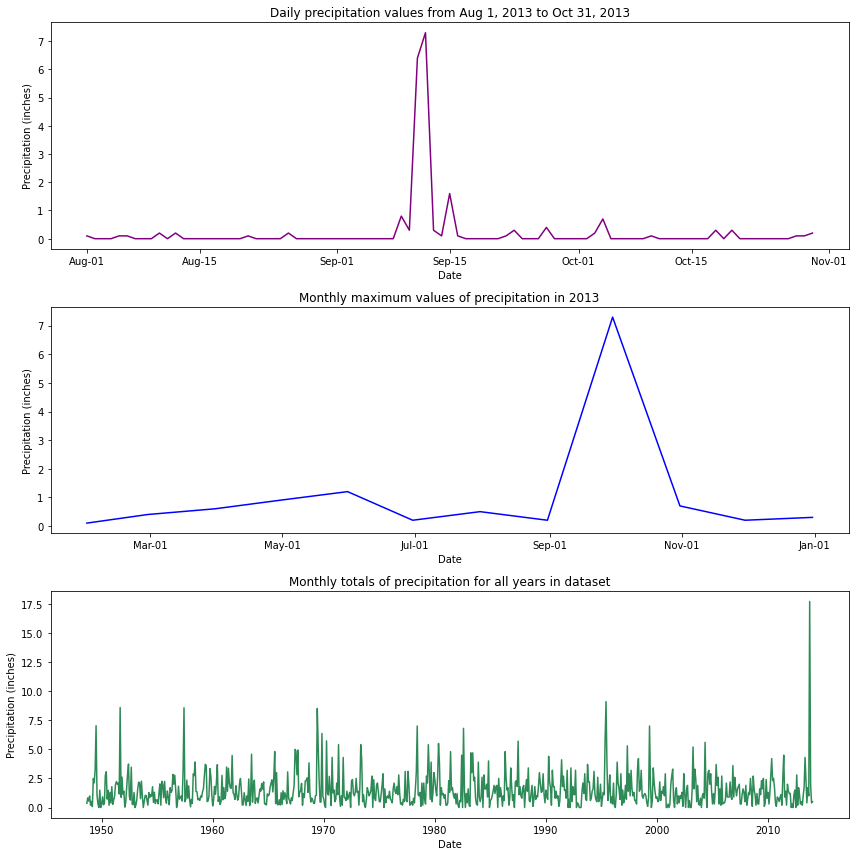

In [62]:
# YOUR CODE HERE
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Fig 1
ax[0].plot(
    precip_aug_oct_2013_dailysum.index.values,
    precip_aug_oct_2013_dailysum['HPCP'],
    color='purple',
)
ax[0].set(
       xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily precipitation values from Aug 1, 2013 to Oct 31, 2013",
)
date_form = DateFormatter("%b-%d")
ax[0].xaxis.set_major_formatter(date_form)

# Fig 2
ax[1].plot(
    precip_2013_monthly_max_dailysum.index.values,
    precip_2013_monthly_max_dailysum['HPCP'],
    color='blue',
)
ax[1].set(
       xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly maximum values of precipitation in 2013",
)
date_form = DateFormatter("%b-%d")
ax[1].xaxis.set_major_formatter(date_form)

# Fig 3
ax[2].plot(
    precip_monthlysum.index.values,
    precip_monthlysum['HPCP'],
    color='seagreen',
)
ax[2].set(
       xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly totals of precipitation for all years in dataset",
)
date_form = DateFormatter("%Y")
ax[2].xaxis.set_major_formatter(date_form)

for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)

plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
precip_plot = nb.convert_axes(plt, which_axes="all")

In [63]:
# DO NOT MODIFY THIS CELL


In [64]:
# DO NOT MODIFY THIS CELL
daily_precip = PlotTester(precip_plot[0])
monthly_max_precip = PlotTester(precip_plot[1])
sum_precip = PlotTester(precip_plot[2])

line_plot_1_test = ag.run_test(daily_precip.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 First plot is a line plot!",
                               error_message="\u274C The first plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")

line_plot_2_test = ag.run_test(monthly_max_precip.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 Second plot is a line plot!",
                               error_message="\u274C The second plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")

line_plot_3_test = ag.run_test(sum_precip.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 Third plot is a line plot!",
                               error_message="\u274C The third plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")


print(line_plot_1_test['message'])
print(line_plot_2_test['message'])
print(line_plot_3_test['message'])


✅ First plot is a line plot!
✅ Second plot is a line plot!
✅ Third plot is a line plot!


## Challenge 2: Open Stream Discharge Data Using Pandas

Using the same functions as above, read in your discharge data. Don't forget to use the `parse_dates` argument to parse the `datetime` column, and to set the `na_values` to the value specified in the information given about this data above. Set the `datetime` column to be the index of the DataFrame.

Call the final `DataFrame` object at the end of the cell. 

In [65]:
# YOUR CODE HERE
discharge = pd.read_csv(
    discharge_path,
    parse_dates = ['datetime'],
    index_col = ['datetime'],
)

discharge

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A
...,...,...,...,...
2013-12-27,USGS,6730200,38.0,A
2013-12-28,USGS,6730200,32.0,A
2013-12-29,USGS,6730200,31.0,A


In [66]:
# DO NOT MODIFY THIS CELL


### Challenge 2a: Subset Stream Discharge Data To Your Study Time Period

In the cell below, subset the stream discharge data to the same timeframe 
that you are interested in: August 1st, 2013 to October 31st, 2013. This should include both August 1st and October 31st. Check your dataframe to ensure it starts and stops on the correct dates, some subsetting methods will return slightly different start and end times!

Call the final `DataFrame` object at the end of the cell. 

In [67]:
# YOUR CODE HERE
discharge_aug_oct_2013 = (discharge
    .loc['2013-08-01':'2013-10-31']
)
discharge_aug_oct_2013

,agency_cd,site_no,disValue,qualCode
datetime,,,,
2013-08-01,USGS,6730200,64.0,A
2013-08-02,USGS,6730200,68.0,A
2013-08-03,USGS,6730200,65.0,A
2013-08-04,USGS,6730200,65.0,A
2013-08-05,USGS,6730200,62.0,A
...,...,...,...,...
2013-10-27,USGS,6730200,156.0,A
2013-10-28,USGS,6730200,148.0,A
2013-10-29,USGS,6730200,123.0,A


In [68]:
# DO NOT MODIFY THIS CELL


### Challenge 2b: Calculate the Monthly Maximum and Sum for Stream Discharge Data in 2013

Use your original stream discharge dataset to calculate the maximum 
daily discharge rate **for each month in the year 2013**.

HINT: you can calulate multiple summary values using the `.agg()`.
The approach looks like this:

```python
your_df['year-here'].resample('value-here').agg({'column-you-want-to-summarize': ['max', 'sum']})
```

In the code above, you use `.agg` to summarize a specific column. You then specify which 
summary statistics you want. In the example above you are using max and sum values.

Call the final `DataFrame` object at the end of the cell. 

In [76]:
# YOUR CODE HERE
discharge_2013_monthly_max_sum = (discharge
    .loc['2013']
    .resample('M').agg({'disValue': ['max', 'sum']})
)

discharge_2013_monthly_max_sum

disValue         
                max      sum
datetime                    
2013-01-31     26.0    332.4
2013-02-28      4.7     93.6
2013-03-31      8.9    183.1
2013-04-30     35.0    477.2
2013-05-31    501.0   6937.0
2013-06-30    629.0   7888.0
2013-07-31    136.0   2714.0
2013-08-31    108.0   1704.0
2013-09-30   4770.0  25844.0
2013-10-31    424.0   6801.0
2013-11-30     94.0   1917.0
2013-12-31     53.0   1064.0

In [77]:
# DO NOT MODIFY THIS CELL


## Challenge 2c: Clean Up Multi-index Dataframes

Above you created an output dataframe with that is called a multi-index.
A multi-index is when you have two or more header columns. It might 
be nice to clean that up for plotting. 

To combine the two headers into a single header in your dataframe, you can 
use the following approach (in the example below `df` is your dataframe
name):

`df.columns = df.columns.map('-'.join)`

Below you are joining the headers and adding a `-` between the first 
header name and the second. The result should be a column called
`disValue-max` or `disValue-sum`.

Give this a try in the cell below.

IMPORTANT: if you run the code more than once it will continue to modify your
header columns! You may need to restart and run all cells to fix 
any issues with your columns if you have run the cell more than once. 

In [78]:
# YOUR CODE HERE
discharge_2013_monthly_max_sum.columns = discharge_2013_monthly_max_sum.columns.map("_".join)
discharge_2013_monthly_max_sum

,disValue_max,disValue_sum
datetime,,
2013-01-31,26.0,332.4
2013-02-28,4.7,93.6
2013-03-31,8.9,183.1
2013-04-30,35.0,477.2
2013-05-31,501.0,6937.0
2013-06-30,629.0,7888.0
2013-07-31,136.0,2714.0
2013-08-31,108.0,1704.0
2013-09-30,4770.0,25844.0


In [79]:
# DO NOT MODIFY THIS CELL

# Test to ensure your dataframe no longer has a MultiIndex
reindex_monthly_max_points = 0

student_reindex_monthly = _

if isinstance(student_reindex_monthly.columns, pd.MultiIndex):
    print("\u274C Your monthly max for the discharge DataFrame is still a multi index.")
else:
    print("\u2705 Your monthly max for the discharge DataFrame is no longer a multi index, good job!")
    reindex_monthly_max_points += 3


✅ Your monthly max for the discharge DataFrame is no longer a multi index, good job!


## Challenge 2d: Calculate Monthly Total Stream Discharge

In the cell below, calculate the sum for each month of stream discharge for 
the entire time period in the data.

Be sure to call your dataframe at the end of the cell.

In [80]:
# YOUR CODE HERE
discharge_monthlysum = (discharge
    .resample('M').sum()
)

discharge_monthlysum

,site_no,disValue
datetime,,
1986-10-31,208636200,978.0
1986-11-30,201906000,1556.0
1986-12-31,208636200,2000.0
1987-01-31,208636200,2116.0
1987-02-28,188445600,1653.0
...,...,...
2013-08-31,208636200,1704.0
2013-09-30,201906000,25844.0
2013-10-31,208636200,6801.0


In [81]:
# DO NOT MODIFY THIS CELL

## Challenge 2e: Figure - Plot Stream Discharge Data

Create a vertically stacked figure that contains the following stream discharge subplots (You should have all of the data above needed to create these figures:

* Subplot 1: daily discharge values from Aug 1, 2013 to Oct 31, 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 2: Monthly maximum stream discharge for 2013
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis tick labels should be month-day (e.g. "Aug-01")
* Subplot 3: monthly totals of discharge for all years in dataset
    * Plot needs a title, x axis label, and y axis label. The y label should have units of measure in it. 
    * X axis label should be Year (e.g. "2013")
       
You can use the `DateFormatter` package imported above to ensure you x axis labels are formatted correctly. 

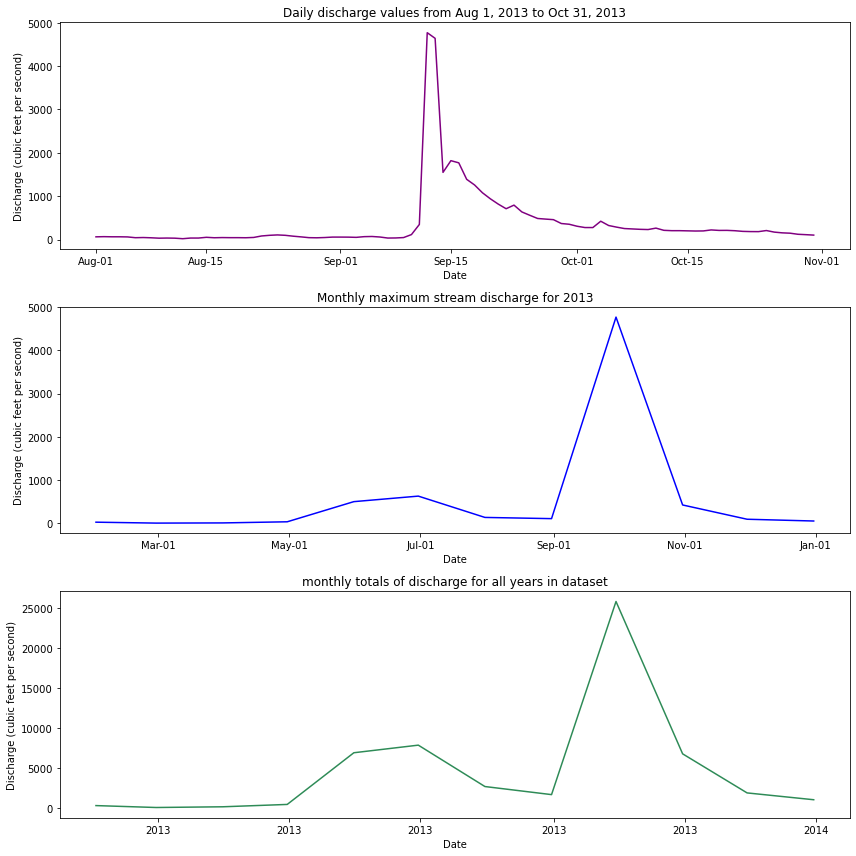

In [82]:
# YOUR CODE HERE
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Fig 1
ax[0].plot(
    discharge_aug_oct_2013.index.values,
    discharge_aug_oct_2013['disValue'],
    color='purple',
)
ax[0].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Daily discharge values from Aug 1, 2013 to Oct 31, 2013",
)
date_form = DateFormatter("%b-%d")
ax[0].xaxis.set_major_formatter(date_form)

# Fig 2
ax[1].plot(
    discharge_2013_monthly_max_sum.index.values,
    discharge_2013_monthly_max_sum['disValue_max'],
    color='blue',
)
ax[1].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Monthly maximum stream discharge for 2013",
)
date_form = DateFormatter("%b-%d")
ax[1].xaxis.set_major_formatter(date_form)

# Fig 3
ax[2].plot(
    discharge_2013_monthly_max_sum.index.values,
    discharge_2013_monthly_max_sum['disValue_sum'],
    color='seagreen',
)
ax[2].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="monthly totals of discharge for all years in dataset",
)
date_form = DateFormatter("%Y")
ax[2].xaxis.set_major_formatter(date_form)

for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)

plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
disc_plot = nb.convert_axes(plt, which_axes="all")

In [83]:
# DO NOT MODIFY THIS CELL


In [84]:
# DO NOT MODIFY THIS CELL
daily_disc = PlotTester(disc_plot[0])
monthly_max_disc = PlotTester(disc_plot[1])
sum_disc = PlotTester(disc_plot[2])

line_plot_1_test = ag.run_test(daily_disc.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 First plot is a line plot!",
                               error_message="\u274C The first plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")

line_plot_2_test = ag.run_test(monthly_max_disc.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 Second plot is a line plot!",
                               error_message="\u274C The second plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")

line_plot_3_test = ag.run_test(sum_disc.assert_plot_type,
                               plot_type='line',
                               points=0,
                               correct_message="\u2705 Third plot is a line plot!",
                               error_message="\u274C The third plot is not a line plot, make sure to make it to a line plot. Tests will not run successfully if this does not pass.")


print(line_plot_1_test['message'])
print(line_plot_2_test['message'])
print(line_plot_3_test['message'])


✅ First plot is a line plot!
✅ Second plot is a line plot!
✅ Third plot is a line plot!


## Challenge 3 - Figure of Precipitation and Discharge Combined

Above, you created code to plot precipitation and stream discharge in 
two different figures. Create a figure with two subplots stacked on 
top of each other in the cell below as follows:

1. Subplot 1: Daily total precipitation for the flood event time period (aug-october 2013)
2. Subplot 2: Daily stream discharge for the flood event time period (aug-october 2013)

HINT: You can use the SAME CODE that you used above to create the first 
precipitation plot and the first discharge plot to create these subplots! You will
just need to create a new figure and axis object(s) below.


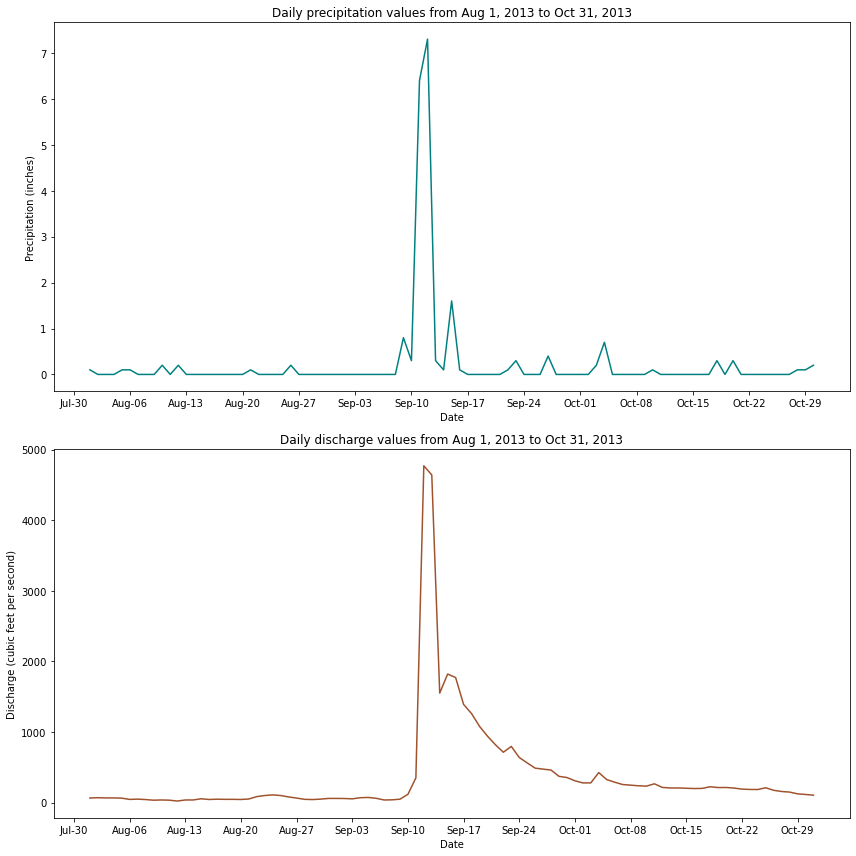

In [95]:
# YOUR CODE HERE
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Fig 1
ax[0].plot(
    precip_aug_oct_2013_dailysum.index.values,
    precip_aug_oct_2013_dailysum['HPCP'],
    color='teal',
)
ax[0].set(
       xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily precipitation values from Aug 1, 2013 to Oct 31, 2013",
)
date_form = DateFormatter("%b-%d")
ax[0].xaxis.set_major_formatter(date_form)

# Fig 2
ax[1].plot(
    discharge_aug_oct_2013.index.values,
    discharge_aug_oct_2013['disValue'],
    color='sienna',
)
ax[1].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Daily discharge values from Aug 1, 2013 to Oct 31, 2013",
)
date_form = DateFormatter("%b-%d")
ax[1].xaxis.set_major_formatter(date_form)


for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
final_comparison_plot = nb.convert_axes(plt, which_axes="all")

In [88]:
# DO NOT MODIFY THIS CELL


## Challenge 3b - Explain Patterns In the Data

Look at the plot that you created above. Describe any patterns you notice
in the data?

1. When was the peak precip / discharge period during the flood?
2. Do the dates associated with peak precip and discharge line up (are they the same?)?

Add your answers to the questions above in the makrdown cell below


1. 13 September 2013
2. More or less, though discharge has heavier tail

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points